In [511]:
import geopandas as gpd
import networkx as nx
from importlib import reload
import pandas as pd
pd.set_option('display.float_format', '{:.4f}'.format)

import lib.utils as utils
reload(utils)
import lib.scoring as scoring
reload(scoring)
import lib.gnn as gnn
reload(gnn)
import lib.property_weights as weights
reload(weights)
import lib.algorithms as algorithms
reload(algorithms)
import lib.simulation as sim
reload(sim)
import lib.results as results
reload(results)

<module 'lib.results' from '/Users/hugoschwabe/Documents/Code/bachelor-thesis/lib/results.py'>

# Initialize NUTS Regions

In [297]:
nuts3 = utils.nuts3()

# Initialization

##### Process Full Graph

In [157]:
original = nx.read_gml("./data/de_cs_virtual_edge.gml")
utils.add_capacity(original)
utils.add_norm_capacity(original)
#utils.add_dummy_supply(original, throughput=5000)
utils.add_supply_from_csv(original, "./data/de_cs_virtual_edge_flow.csv", verbose=True)

Updated 'supply' attribute for 3578 nodes based on CSV data.


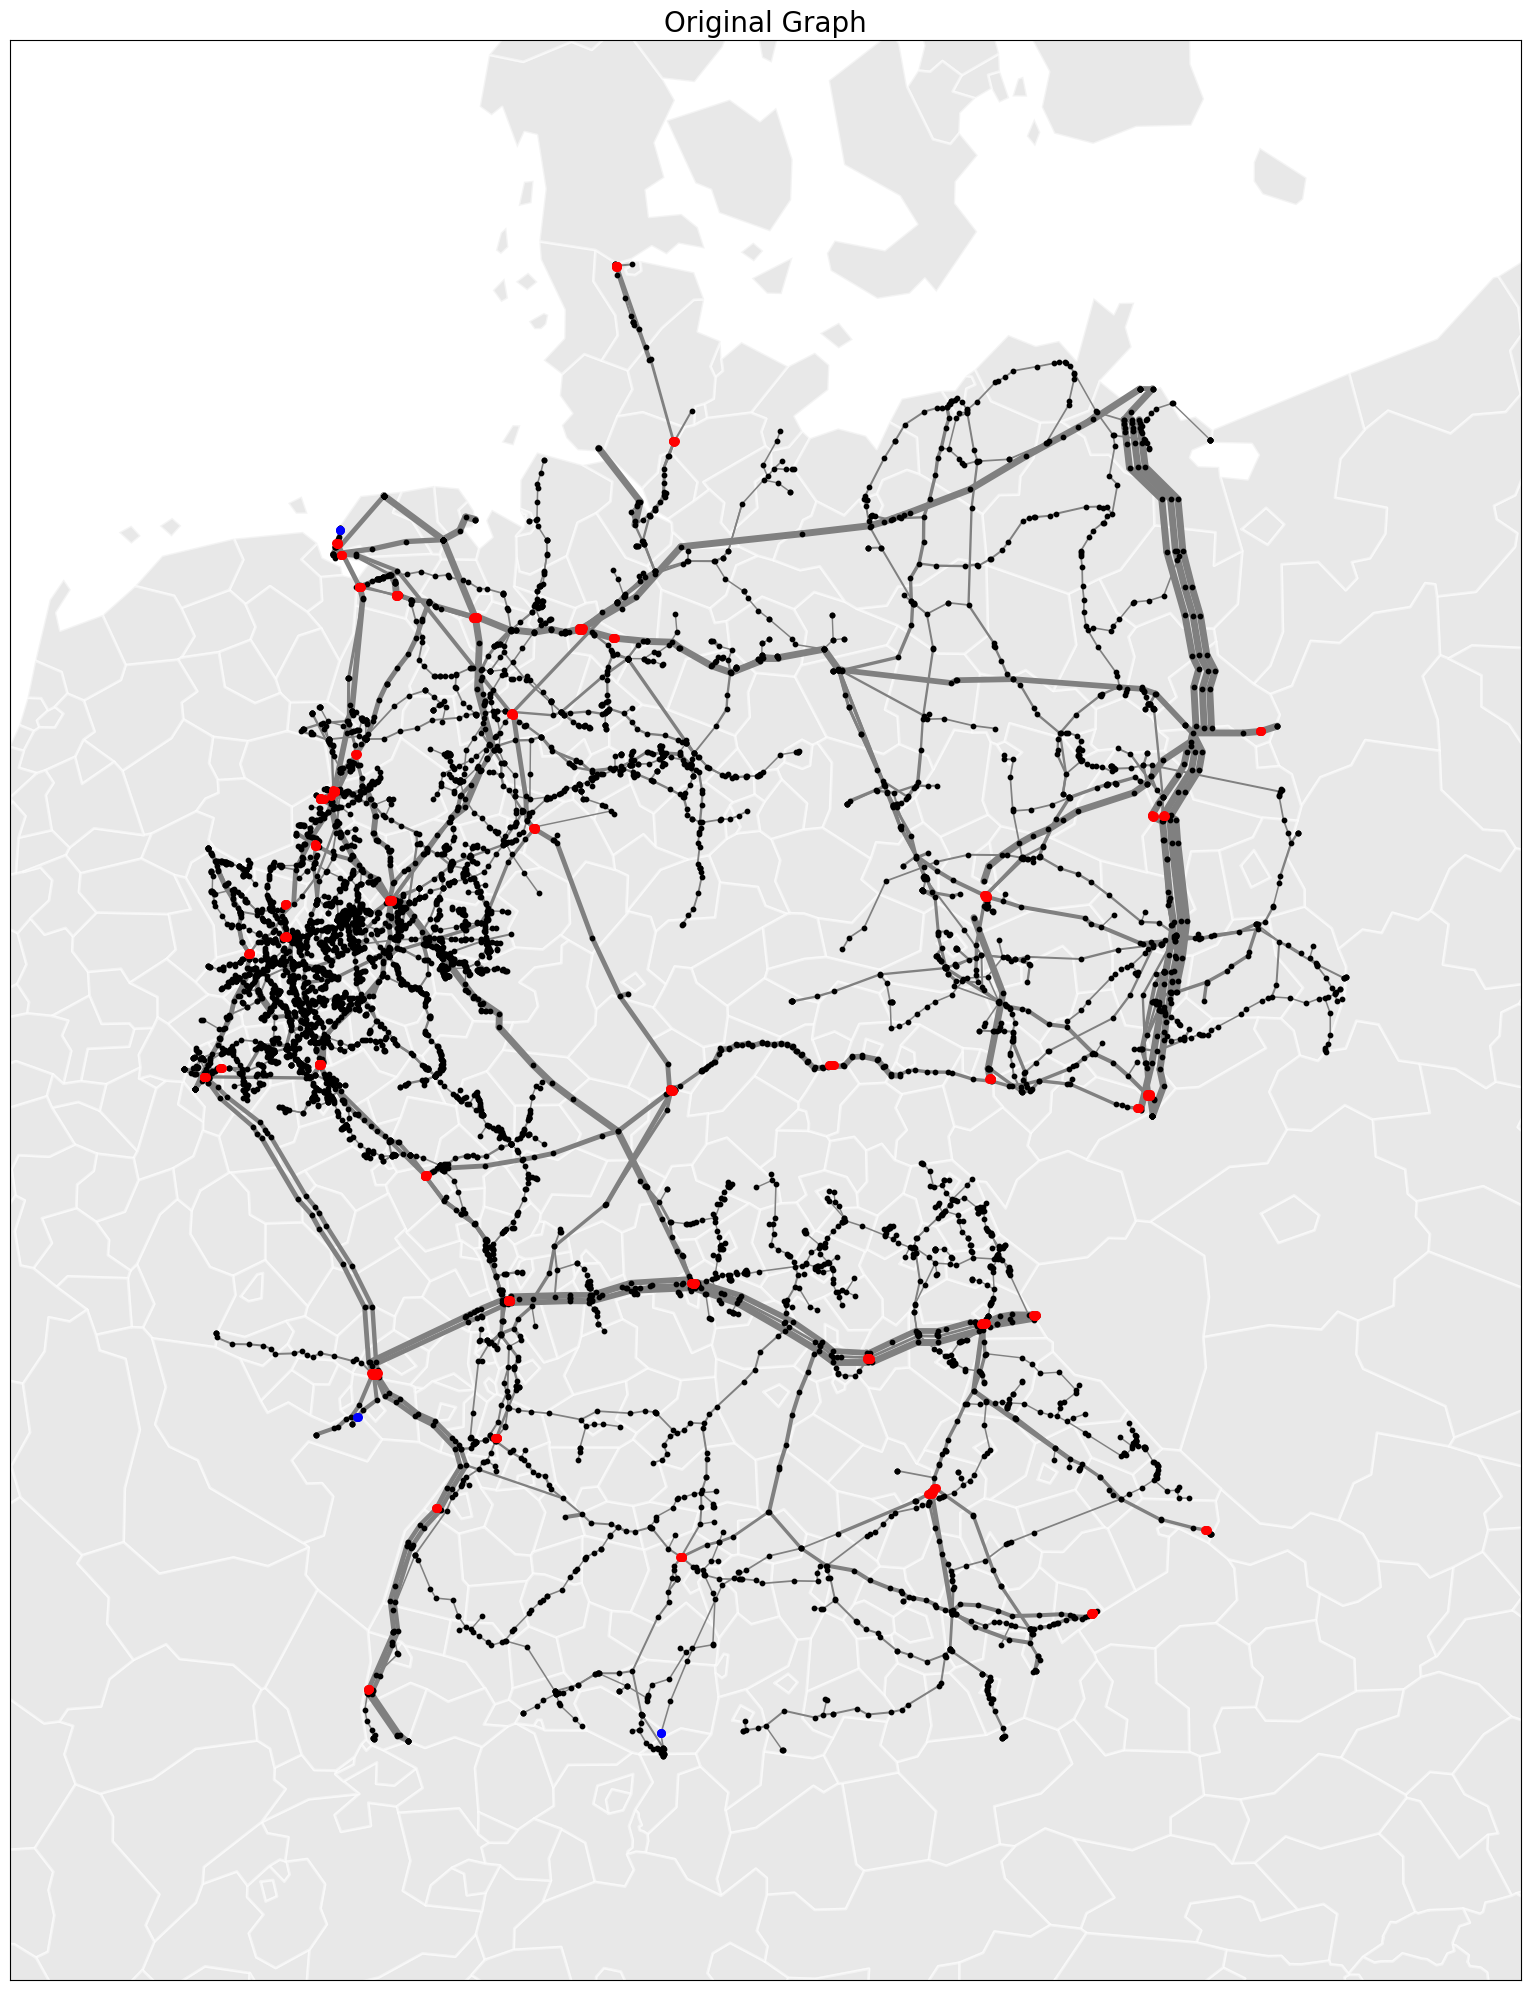

In [522]:
utils.plot_network(
	original,
	gdf=nuts3.to_crs("EPSG:3035"),
	title="Original Graph",
	nodes=False
)

##### Calculating Weights for Properties Score

In [231]:
weights.run_analysis(original)

Network has 7531 nodes and 8513 edges
Baseline Network Deliverability: 4,943.23 kg/s



N-1 Contingency Analysis: 100%|██████████| 7531/7531 [1:15:15<00:00,  1.67node/s, Node=CS08-CS-OUT, Type=CS, Drop=-0.00%]   



Analysis Complete. Returning detailed results DataFrame.
Graphs are isomorphic: False


In [523]:
property_weights = pd.read_csv("data/property_weights.csv").set_index("node_type")
property_weights = property_weights["norm_avg_importance_score"].to_dict()
property_weights

{'IC': 1.0,
 'CV': 0.1960273756837801,
 'CS': 0.1521337975136359,
 'BIO': 0.1400995989987651,
 'X': 0.0544174665024826,
 'IND': 0.0143738892158136,
 'DSO': 0.0141610748092961,
 'GPR': 0.0020140639004673,
 'LNG': 4.8362028814562204e-14,
 'ST': 9.797261539022326e-15,
 'TPP': 0.0}

# Run the Algorithms

##### Community Detection

In [524]:
greedy_modularity_results, greedy_modularity_graph = algorithms.greedy_modularity_communities(
	original,
	["CS", "CV", "IC"]
)
greedy_modularity_score, greedy_modularity_dict = scoring.score(
	original, 
	greedy_modularity_graph, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
greedy_modularity_score

nodes_score: 0.9130261585446819
edges_score: 0.873957476800188
pre_cyclo: 983
post_cyclo: 419
cyclomatic_score: 0.5737538148524923
complexity_score: 0.7869124833991208

pdiv_score: 0.08833779653707086
emd_score: 0.6100308088495932
spectral_dist_score: 0.3700968679847423
structure_score: 0.35615515779046875

original_regions: 341
simplified_regions: 128
regionality_score: 0.375366568914956

original_properties: 354143.51704958564
simplified_properties: 1079.9276876176957
properties_score: 0.003049406908856467

max_dev_error: 0.0003332664542096508
flow_score: 0.9996667335457904

Overall Weighted Score: 0.5042300701118385


np.float64(0.5042300701118385)

In [525]:
louvain_results, louvain_graph = algorithms.louvain_communities(
	original,
	["CS", "CV", "IC"]
)
louvain_score, louvain_dict = scoring.score(
	original, 
	louvain_graph, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
louvain_score

nodes_score: 0.9144867879431682
edges_score: 0.8752496182309409
pre_cyclo: 983
post_cyclo: 419
cyclomatic_score: 0.5737538148524923
complexity_score: 0.7878300736755337

pdiv_score: 0.09331933431645645
emd_score: 0.7436017092852906
spectral_dist_score: 0.3702418591744702
structure_score: 0.4023876342587391

original_regions: 341
simplified_regions: 123
regionality_score: 0.36070381231671556

original_properties: 354143.51704958564
simplified_properties: 1080.8352757266434
properties_score: 0.0030519696780876293

max_dev_error: 0.0003332664542098348
flow_score: 0.9996667335457902

Overall Weighted Score: 0.5107280446949732


np.float64(0.5107280446949732)

In [526]:
k_means_results, k_means_graph = algorithms.k_means(
	original,
	["CS", "CV", "IC"]
)
k_means_score, k_means_dict = scoring.score(
	original, 
	k_means_graph, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
k_means_score


---> Optimal k found: 250 with score 0.4796 <---

Clustering 7009 nodes into 250 communities based on location...
Clustering complete.
Geographic Clustering Finished. Found 250 communities

nodes_score: 0.897490373124419
edges_score: 0.8387172559614707
pre_cyclo: 983
post_cyclo: 602
cyclomatic_score: 0.387589013224822
complexity_score: 0.7079322141035705

pdiv_score: 0.2410230710085992
emd_score: 0.8034890838647766
spectral_dist_score: 0.37557010759813353
structure_score: 0.47336075415716977

original_regions: 341
simplified_regions: 217
regionality_score: 0.6363636363636364

original_properties: 354143.51704958564
simplified_properties: 15399.681846195192
properties_score: 0.04348429691581501

max_dev_error: 0.0004666182677716469
flow_score: 0.9995333817322284

Overall Weighted Score: 0.572134856654484


np.float64(0.572134856654484)

##### Community Detection in Attributed Graphs

In [527]:
gnn_results, gnn_graph = algorithms.gnn_clustering(
	original,
	["CS", "CV", "IC"]
)
gnn_score, gnn_dict = scoring.score(
	original, 
	gnn_graph, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
gnn_score


--- Starting GNN Model Training ---

--- Finding Optimal Hyperparameters (k and coord_weight) ---

Testing Coordinate Weight: 0.5

Testing Coordinate Weight: 1.0

Testing Coordinate Weight: 2.0

Testing Coordinate Weight: 5.0

Testing Coordinate Weight: 10.0

---> Optimal Hyperparameters Found <---
  - Best Coordinate Weight: 0.5
  - Best Number of Clusters (k): 250
  - With Silhouette Score: 0.3776
Clustering 7009 nodes using combined features (Embeddings + Coords)...
Clustering complete.
nodes_score: 0.897490373124419
edges_score: 0.7520263126982263
pre_cyclo: 983
post_cyclo: 1340
cyclomatic_score: 0
complexity_score: 0.5498388952742151

pdiv_score: 0.031233272354253105
emd_score: 0.9344467309647289
spectral_dist_score: 0.3750398982092579
structure_score: 0.4469066338427466

original_regions: 341
simplified_regions: 167
regionality_score: 0.4897360703812317

original_properties: 354143.51704958564
simplified_properties: 32932.318561242704
properties_score: 0.09299144831340134

max_d

np.float64(0.5158012859087646)

##### Edge Contraction

In [528]:
_, k2_cores = algorithms.k_core(
	original, 
	["CS", "CV", "IC"]
)
k2_cores_score, k2_cores_dict = scoring.score(
	original, 
	k2_cores, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
k2_cores_score

160 nodes inserted.
215 edges inserted.
Reconnecting edges for critical components (CS/CV)...
0 critical component edges re-inserted.

nodes_score: 0.321205683176205
edges_score: 0.27769294020909197
pre_cyclo: 983
post_cyclo: 1038
cyclomatic_score: 0
complexity_score: 0.19963287446176567

pdiv_score: 0.7807877089196011
emd_score: 0.96176557350605
spectral_dist_score: 0.8678365024078368
structure_score: 0.8701299282778293

original_regions: 341
simplified_regions: 288
regionality_score: 0.844574780058651

original_properties: 354143.51704958564
simplified_properties: 379396.63190046075
properties_score: 0.9286924265584134

max_dev_error: 0.3528375040875968
flow_score: 0.6471624959124032

Overall Weighted Score: 0.6980385010538126


np.float64(0.6980385010538126)

In [529]:
_, path_contraction = algorithms.path_contraction(
	original,
	["CS", "CV", "IC"]
)
path_contraction_score, path_contraction_dict = scoring.score(
	original, 
	path_contraction, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
path_contraction_score

99 nodes inserted.
180 edges inserted.
Reconnecting edges for critical components (CS/CV)...
0 critical component edges re-inserted.

nodes_score: 0.6182445890320011
edges_score: 0.5626688593915188
pre_cyclo: 983
post_cyclo: 849
cyclomatic_score: 0.13631739572736523
complexity_score: 0.439076948050295

pdiv_score: 0.6173053946187852
emd_score: 0.96176557350605
spectral_dist_score: 0.7610532120815112
structure_score: 0.7800413934021154

original_regions: 341
simplified_regions: 298
regionality_score: 0.873900293255132

original_properties: 354143.51704958564
simplified_properties: 350257.28979397396
properties_score: 0.9890264057690838

max_dev_error: 0.07687551112811726
flow_score: 0.9231244888718827

Overall Weighted Score: 0.8010339058697018


np.float64(0.8010339058697018)

In [530]:
_, path_contraction_2 = algorithms.path_contraction(
	k2_cores,
	["CS", "CV", "IC"]
)
path_contraction_2_score, path_contraction_2_dict = scoring.score(
	original, 
	path_contraction_2, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
path_contraction_2_score

103 nodes inserted.
203 edges inserted.
Reconnecting edges for critical components (CS/CV)...
0 critical component edges re-inserted.

nodes_score: 0.8305669897755942
edges_score: 0.7549629977681194
pre_cyclo: 983
post_cyclo: 811
cyclomatic_score: 0.17497456765005082
complexity_score: 0.5868348517312548

pdiv_score: 0.4855824660408177
emd_score: 0.96176557350605
spectral_dist_score: 0.748235084473
structure_score: 0.7318610413399559

original_regions: 341
simplified_regions: 206
regionality_score: 0.6041055718475073

original_properties: 354143.51704958564
simplified_properties: 353324.0292514394
properties_score: 0.9976860008479796

max_dev_error: 0.016846864406661784
flow_score: 0.9831531355933382

Overall Weighted Score: 0.7807281202720072


np.float64(0.7807281202720072)

In [531]:
importance = pd.read_csv("data/detailed_property_weights.csv")
importance = importance.set_index("node_name")
importance["impact_pct"] = importance["impact_pct"] / importance["impact_pct"].max()
importance = importance["impact_pct"].sort_values().to_dict()

In [532]:
_, importance_graph = algorithms.importance_removal(
	original,
	importance,
	["CS", "CV", "IC"]
)
importance_score, importance_dict = scoring.score(
	original, 
	importance_graph, 
	nuts3, 
	property_weights=property_weights,
	verbose=True
)
importance_score

206 nodes inserted.
583 edges inserted.
Reconnecting edges for critical components (CS/CV)...
0 critical component edges re-inserted.

Successfully removed 3560 nodes.
nodes_score: 0.47271278714646126
edges_score: 0.4146599318689064
pre_cyclo: 983
post_cyclo: 1013
cyclomatic_score: 0
complexity_score: 0.2957909063384559

pdiv_score: 0.31742188232664925
emd_score: 0.96176557350605
spectral_dist_score: 0.7580731241371154
structure_score: 0.6790868599899382

original_regions: 341
simplified_regions: 320
regionality_score: 0.9384164222873901

original_properties: 354143.51704958564
simplified_properties: 377272.7241623755
properties_score: 0.9346897345305593

max_dev_error: 2.023866182197216e-15
flow_score: 0.999999999999998

Overall Weighted Score: 0.7695967846292684


np.float64(0.7695967846292684)

# Visualization

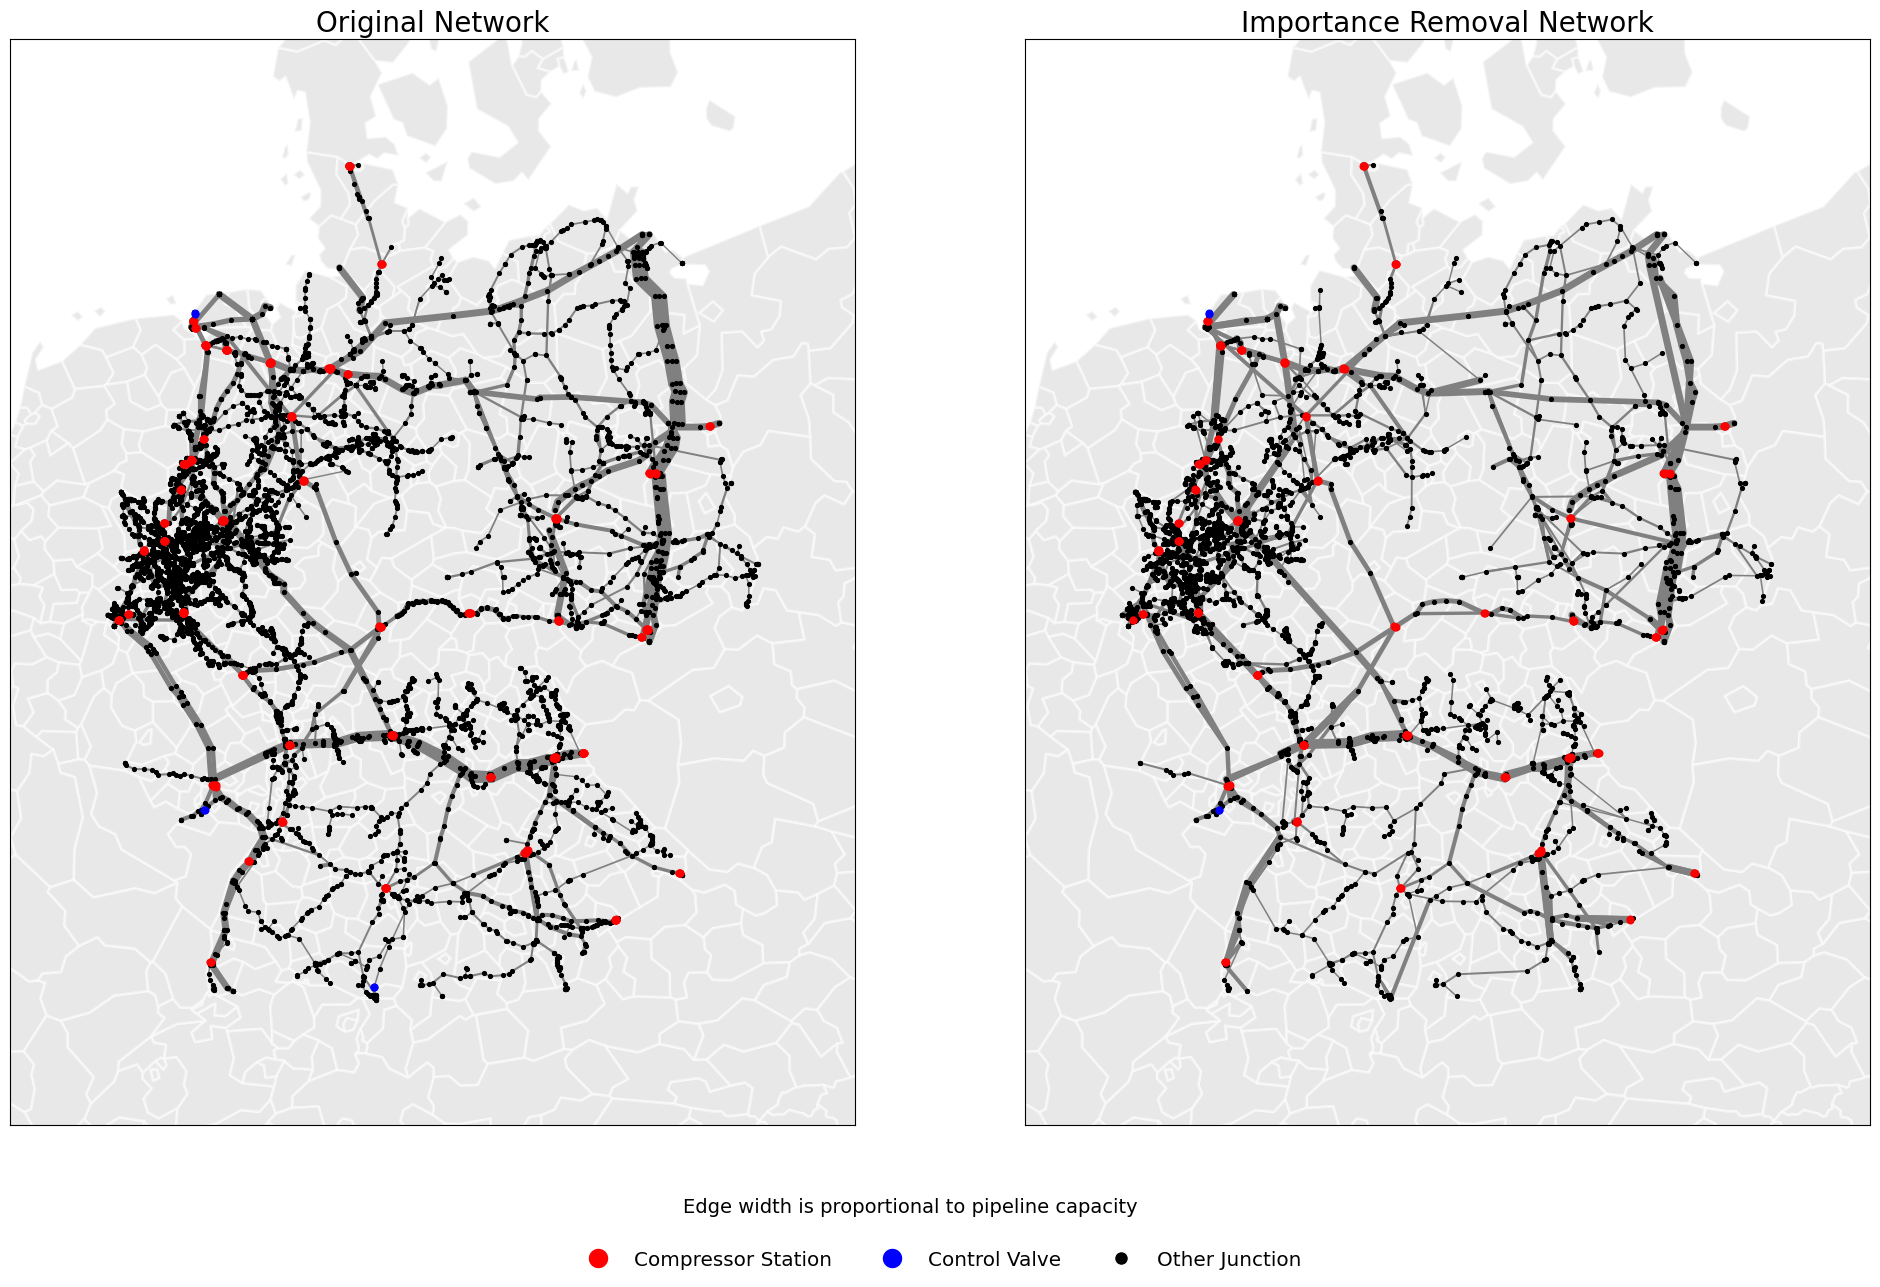

In [475]:
utils.plot_networks_side_by_side(
	original_graph=original,
	simplified_graph=importance_graph,
	gdf=nuts3.to_crs("EPSG:3035"),
	simplified_title="Importance Removal Network"
)

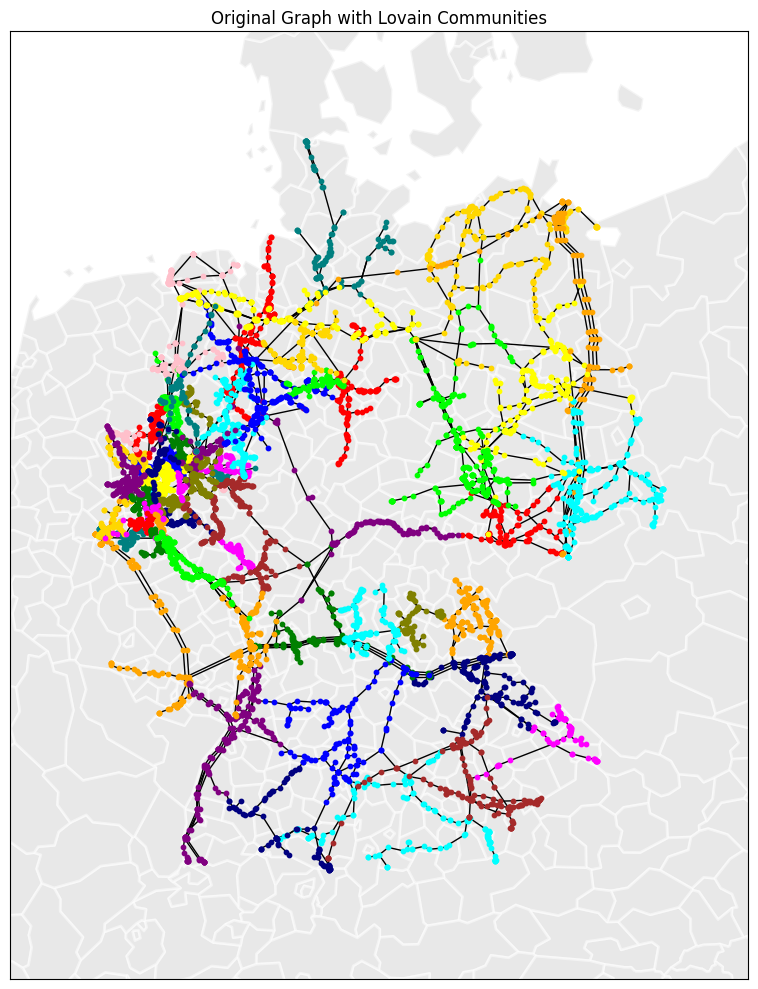

In [ ]:
utils.plot_network(
	graph=original,
	gdf=nuts3.to_crs("EPSG:3035"),
	clusters=louvain_results,
	title="Original Graph with Lovain Communities"
)

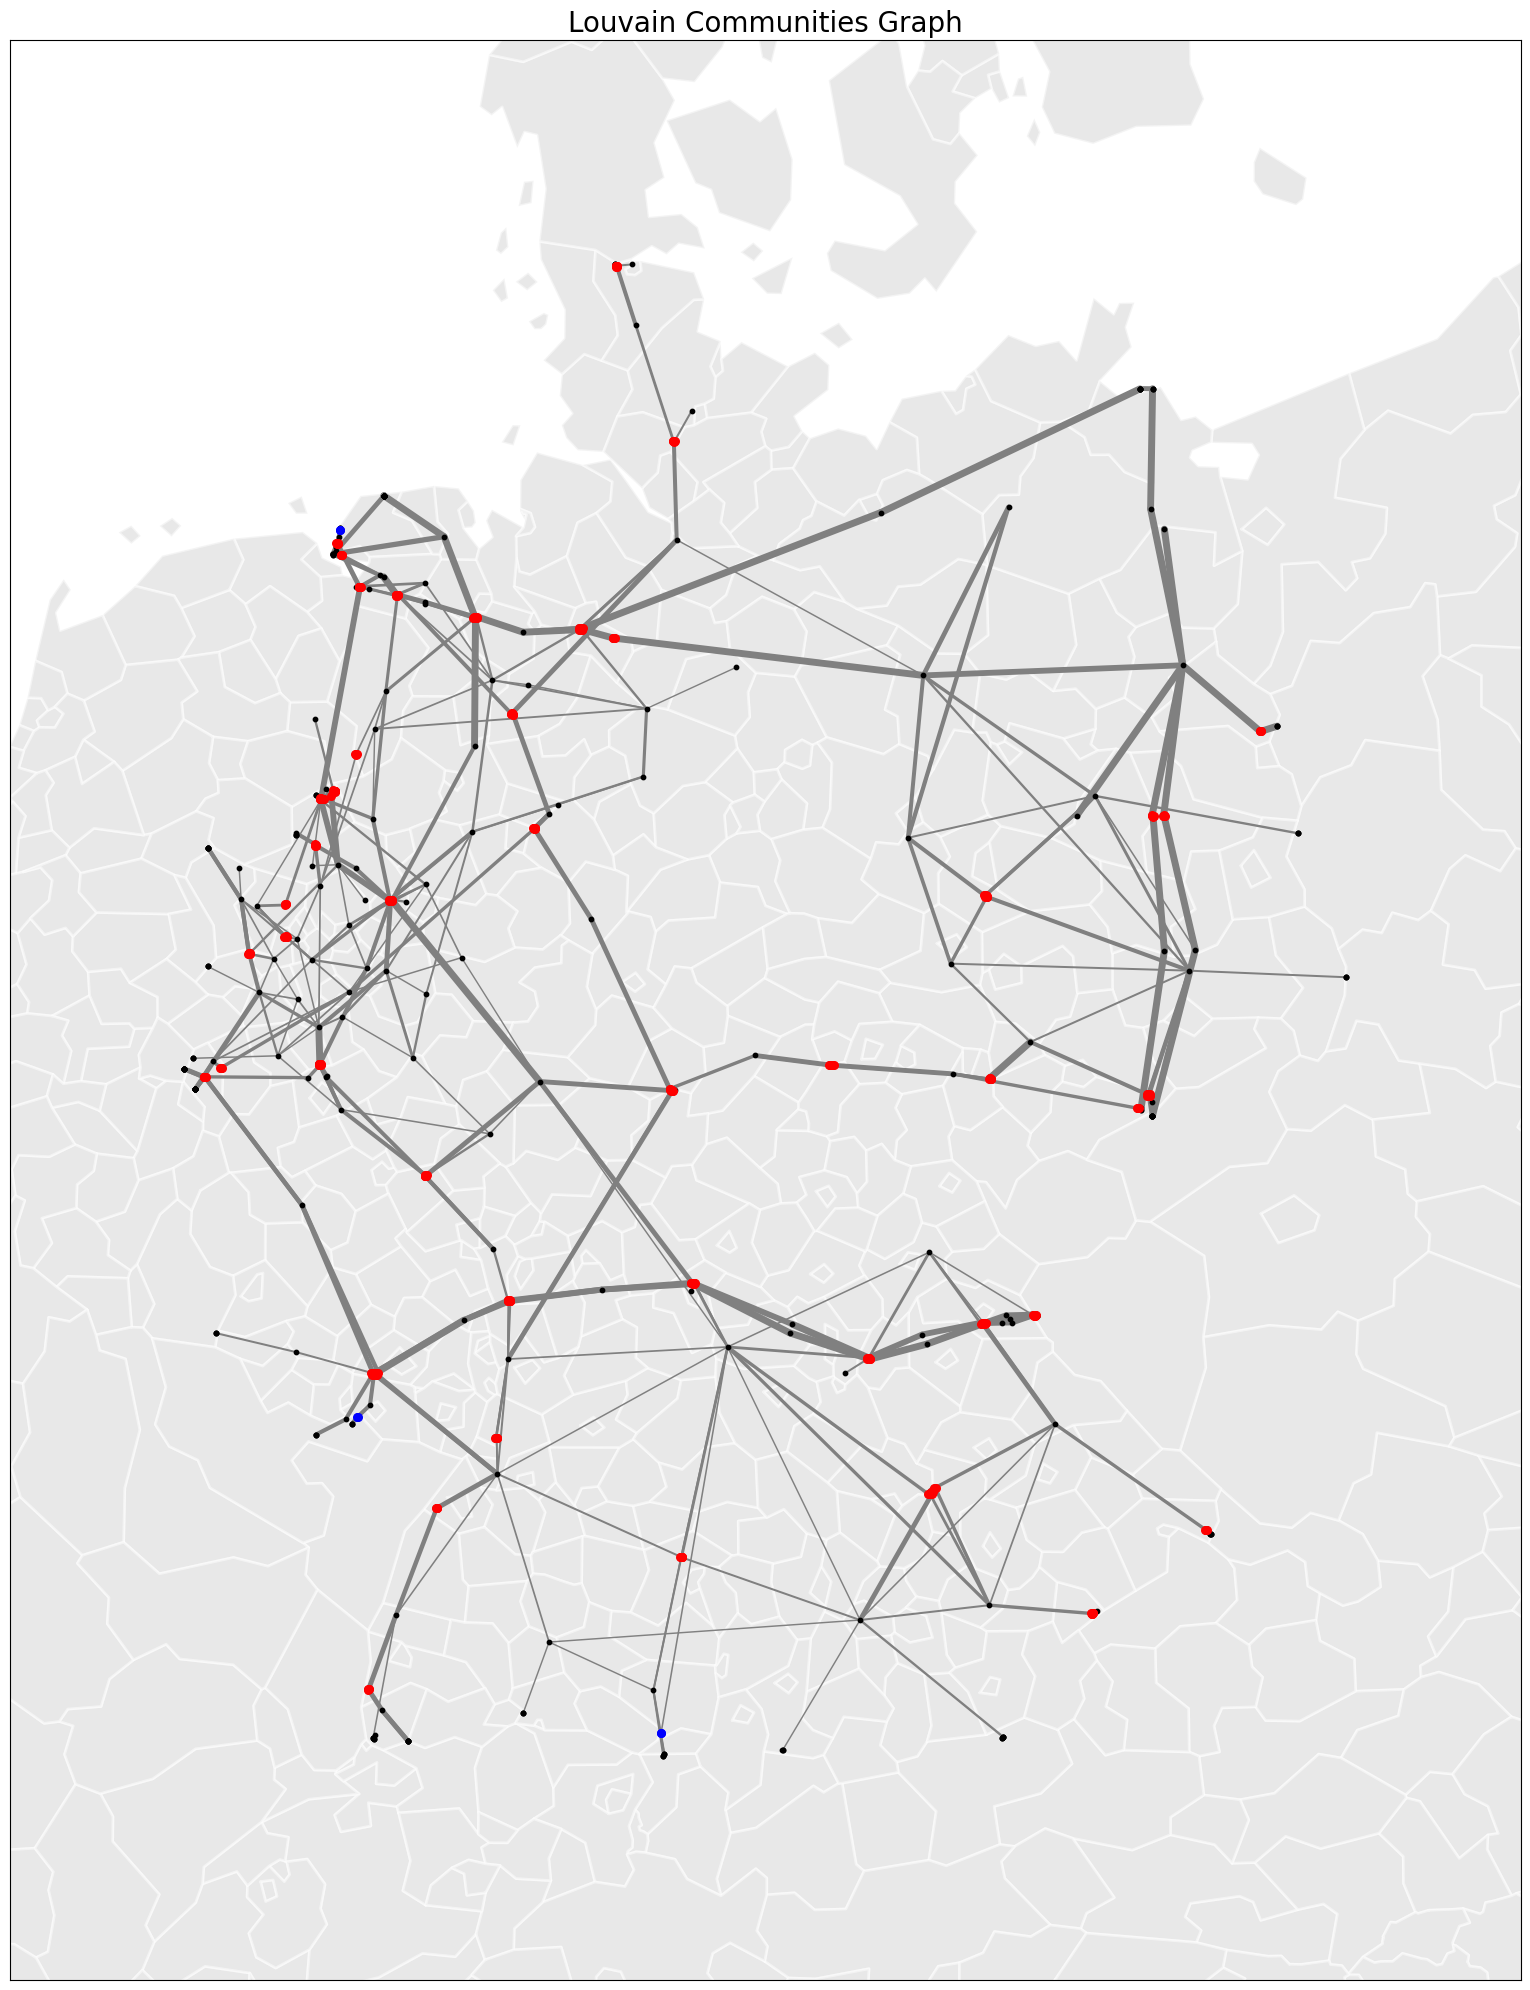

In [515]:
utils.plot_network(
	G=louvain_graph,
	gdf=nuts3.to_crs("EPSG:3035"),
	title="Louvain Communities Graph"
)

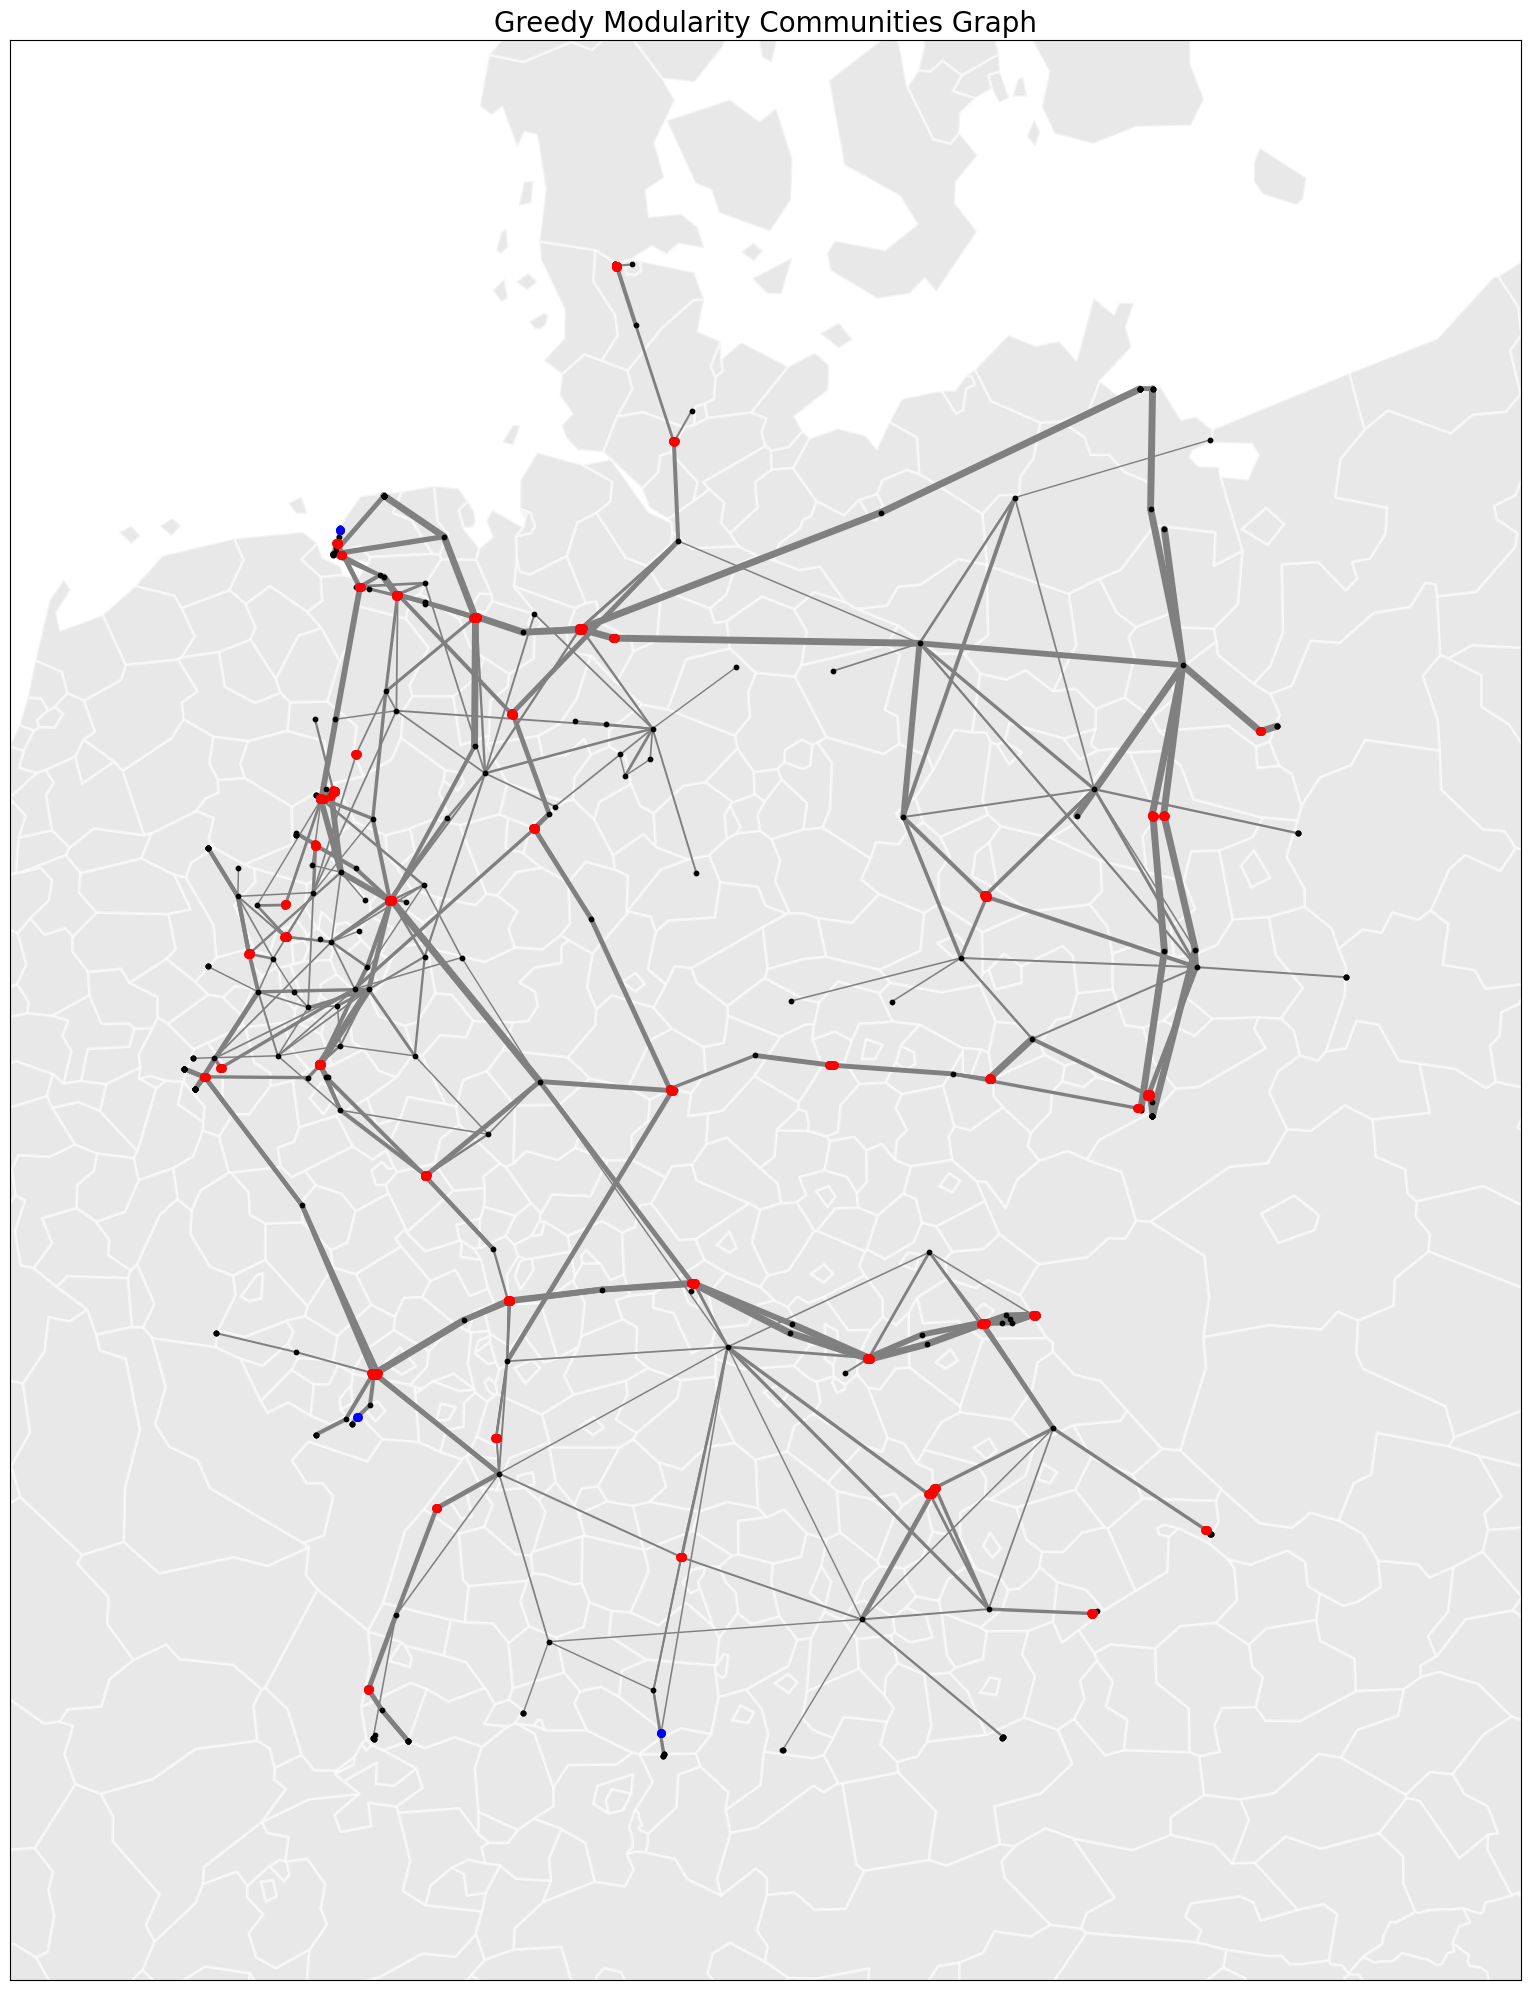

In [516]:
utils.plot_network(
	G=greedy_modularity_graph,
	gdf=nuts3.to_crs("EPSG:3035"),
	title="Greedy Modularity Communities Graph"
)

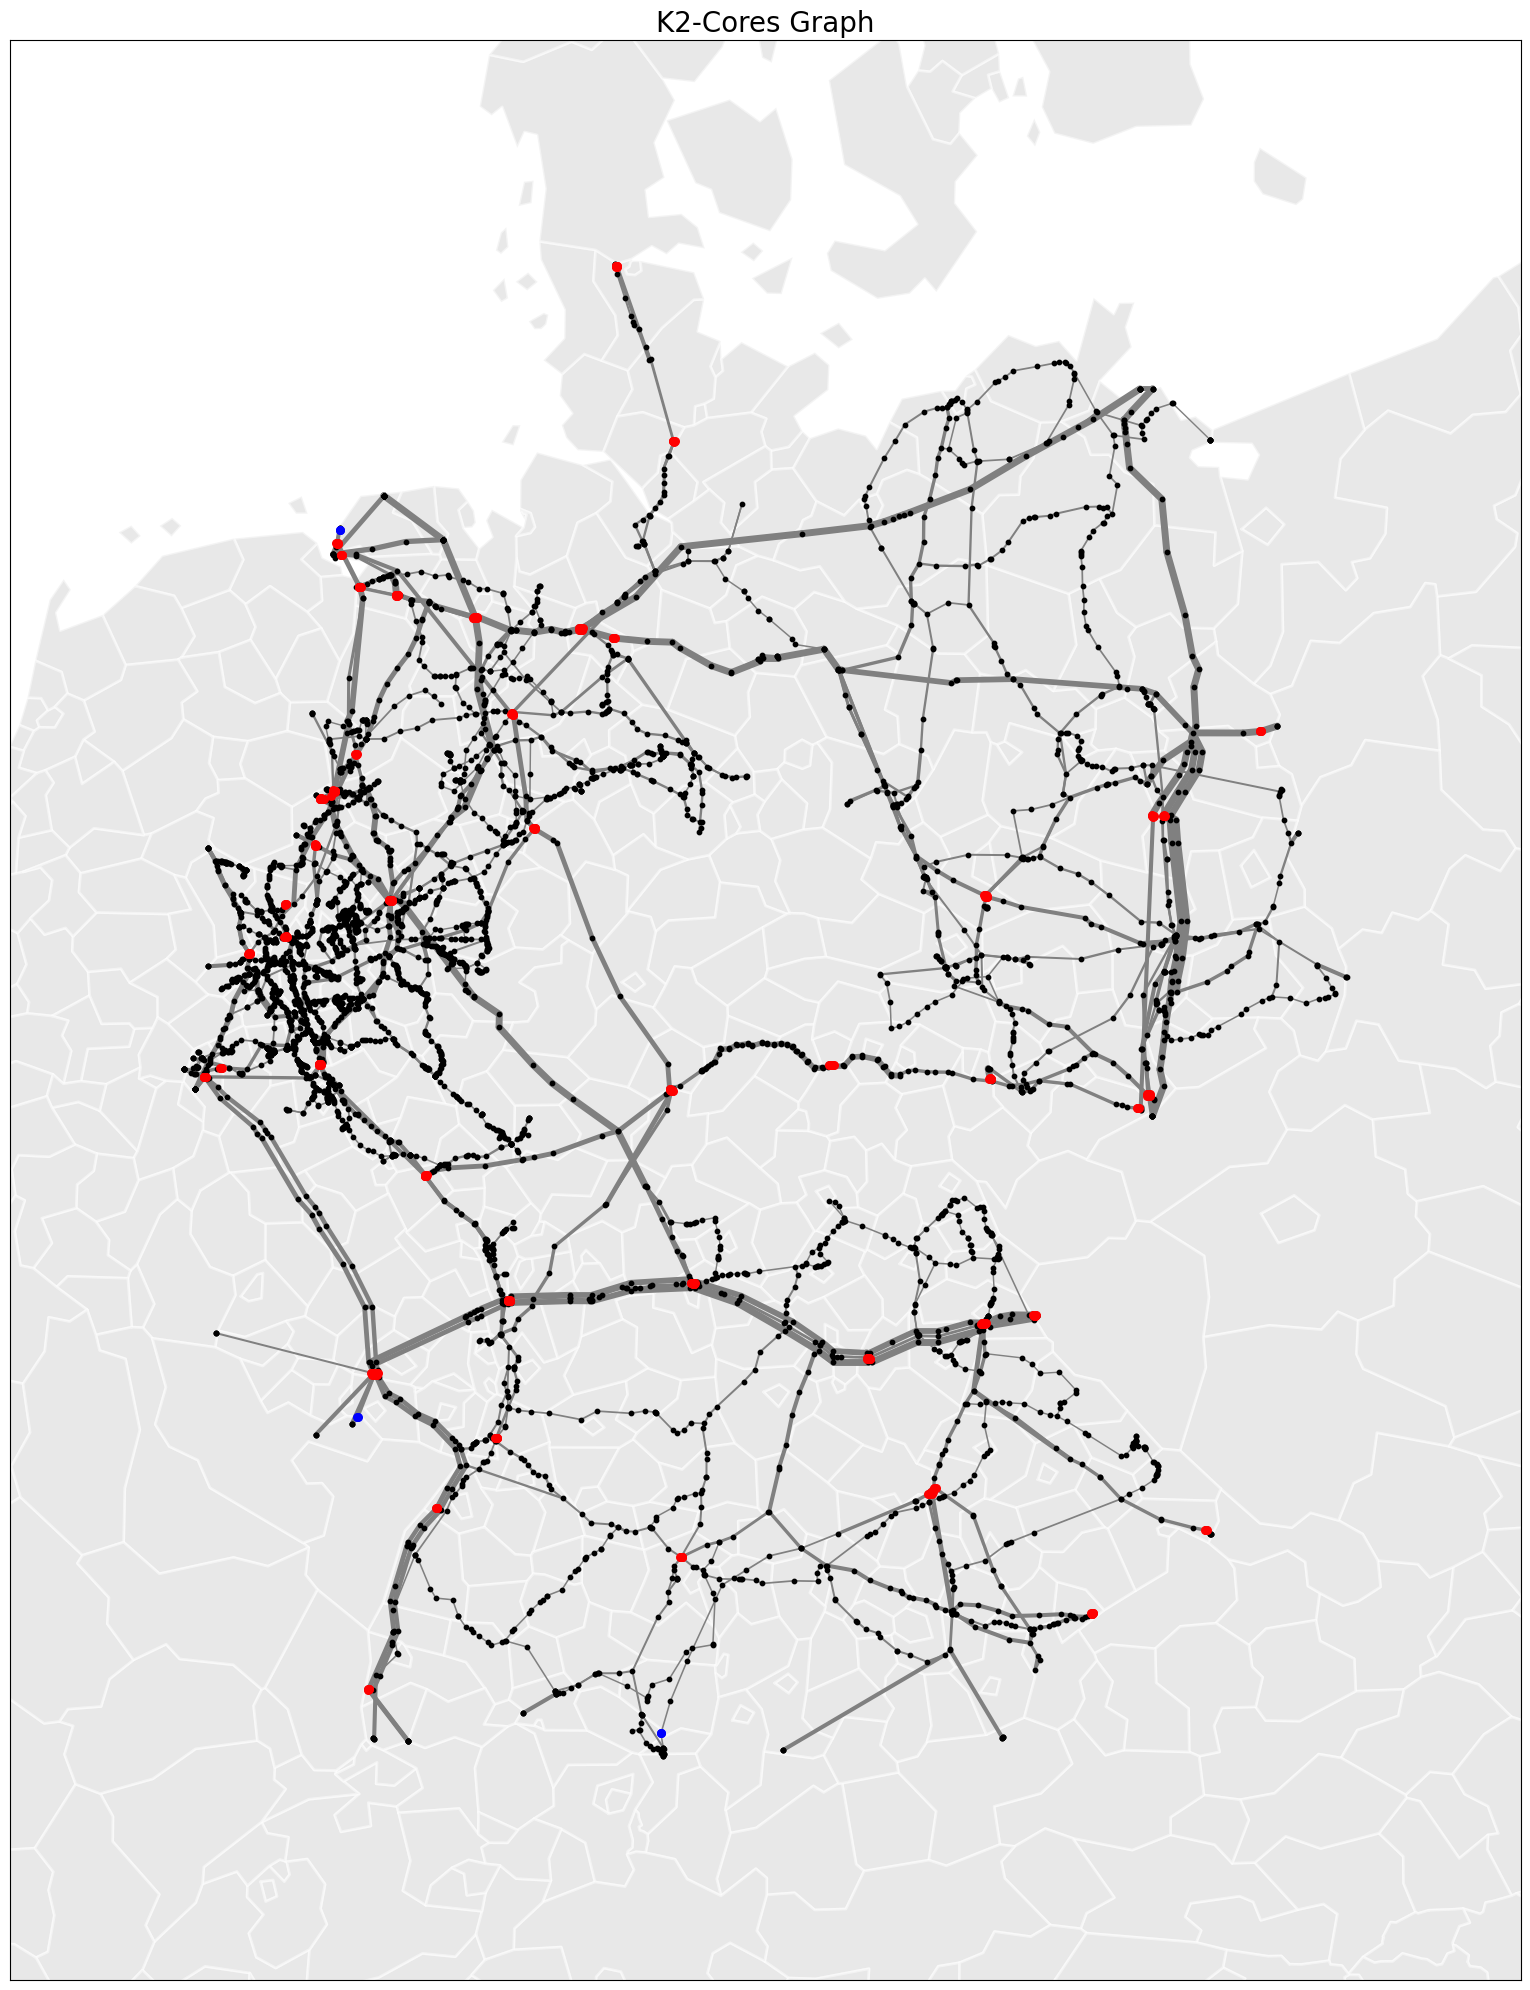

In [517]:
utils.plot_network(
	G=k2_cores,
	gdf=nuts3.to_crs("EPSG:3035"),
	title="K2-Cores Graph"
	)

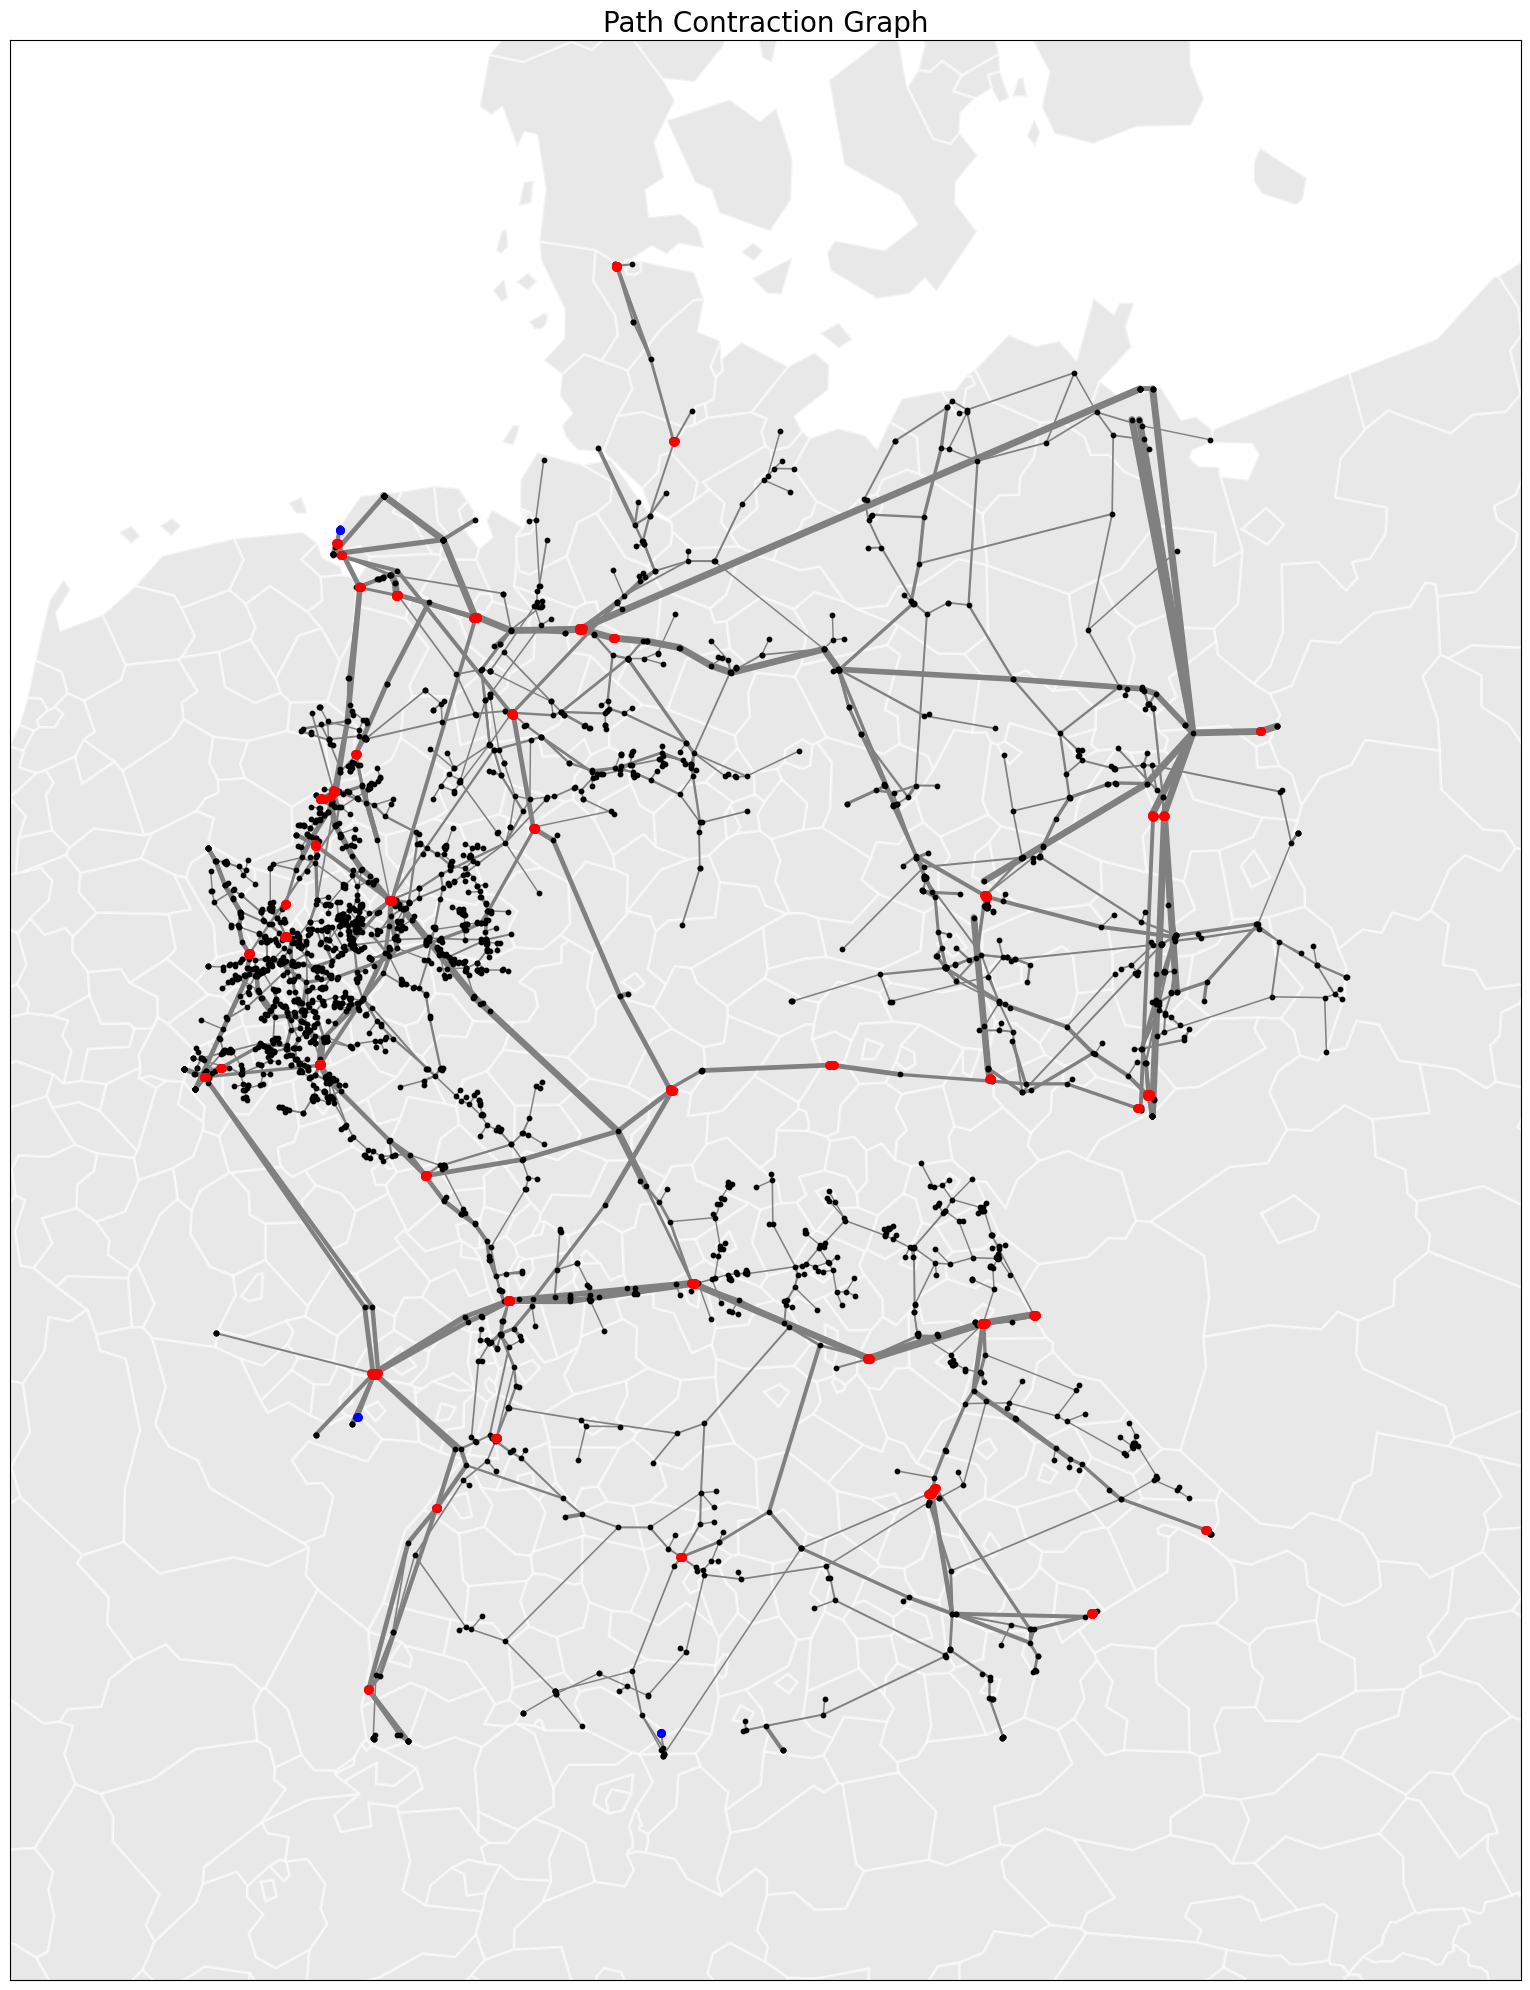

In [518]:
utils.plot_network(
	G=path_contraction,
	gdf=nuts3.to_crs("EPSG:3035"),
	title="Path Contraction Graph"
	)

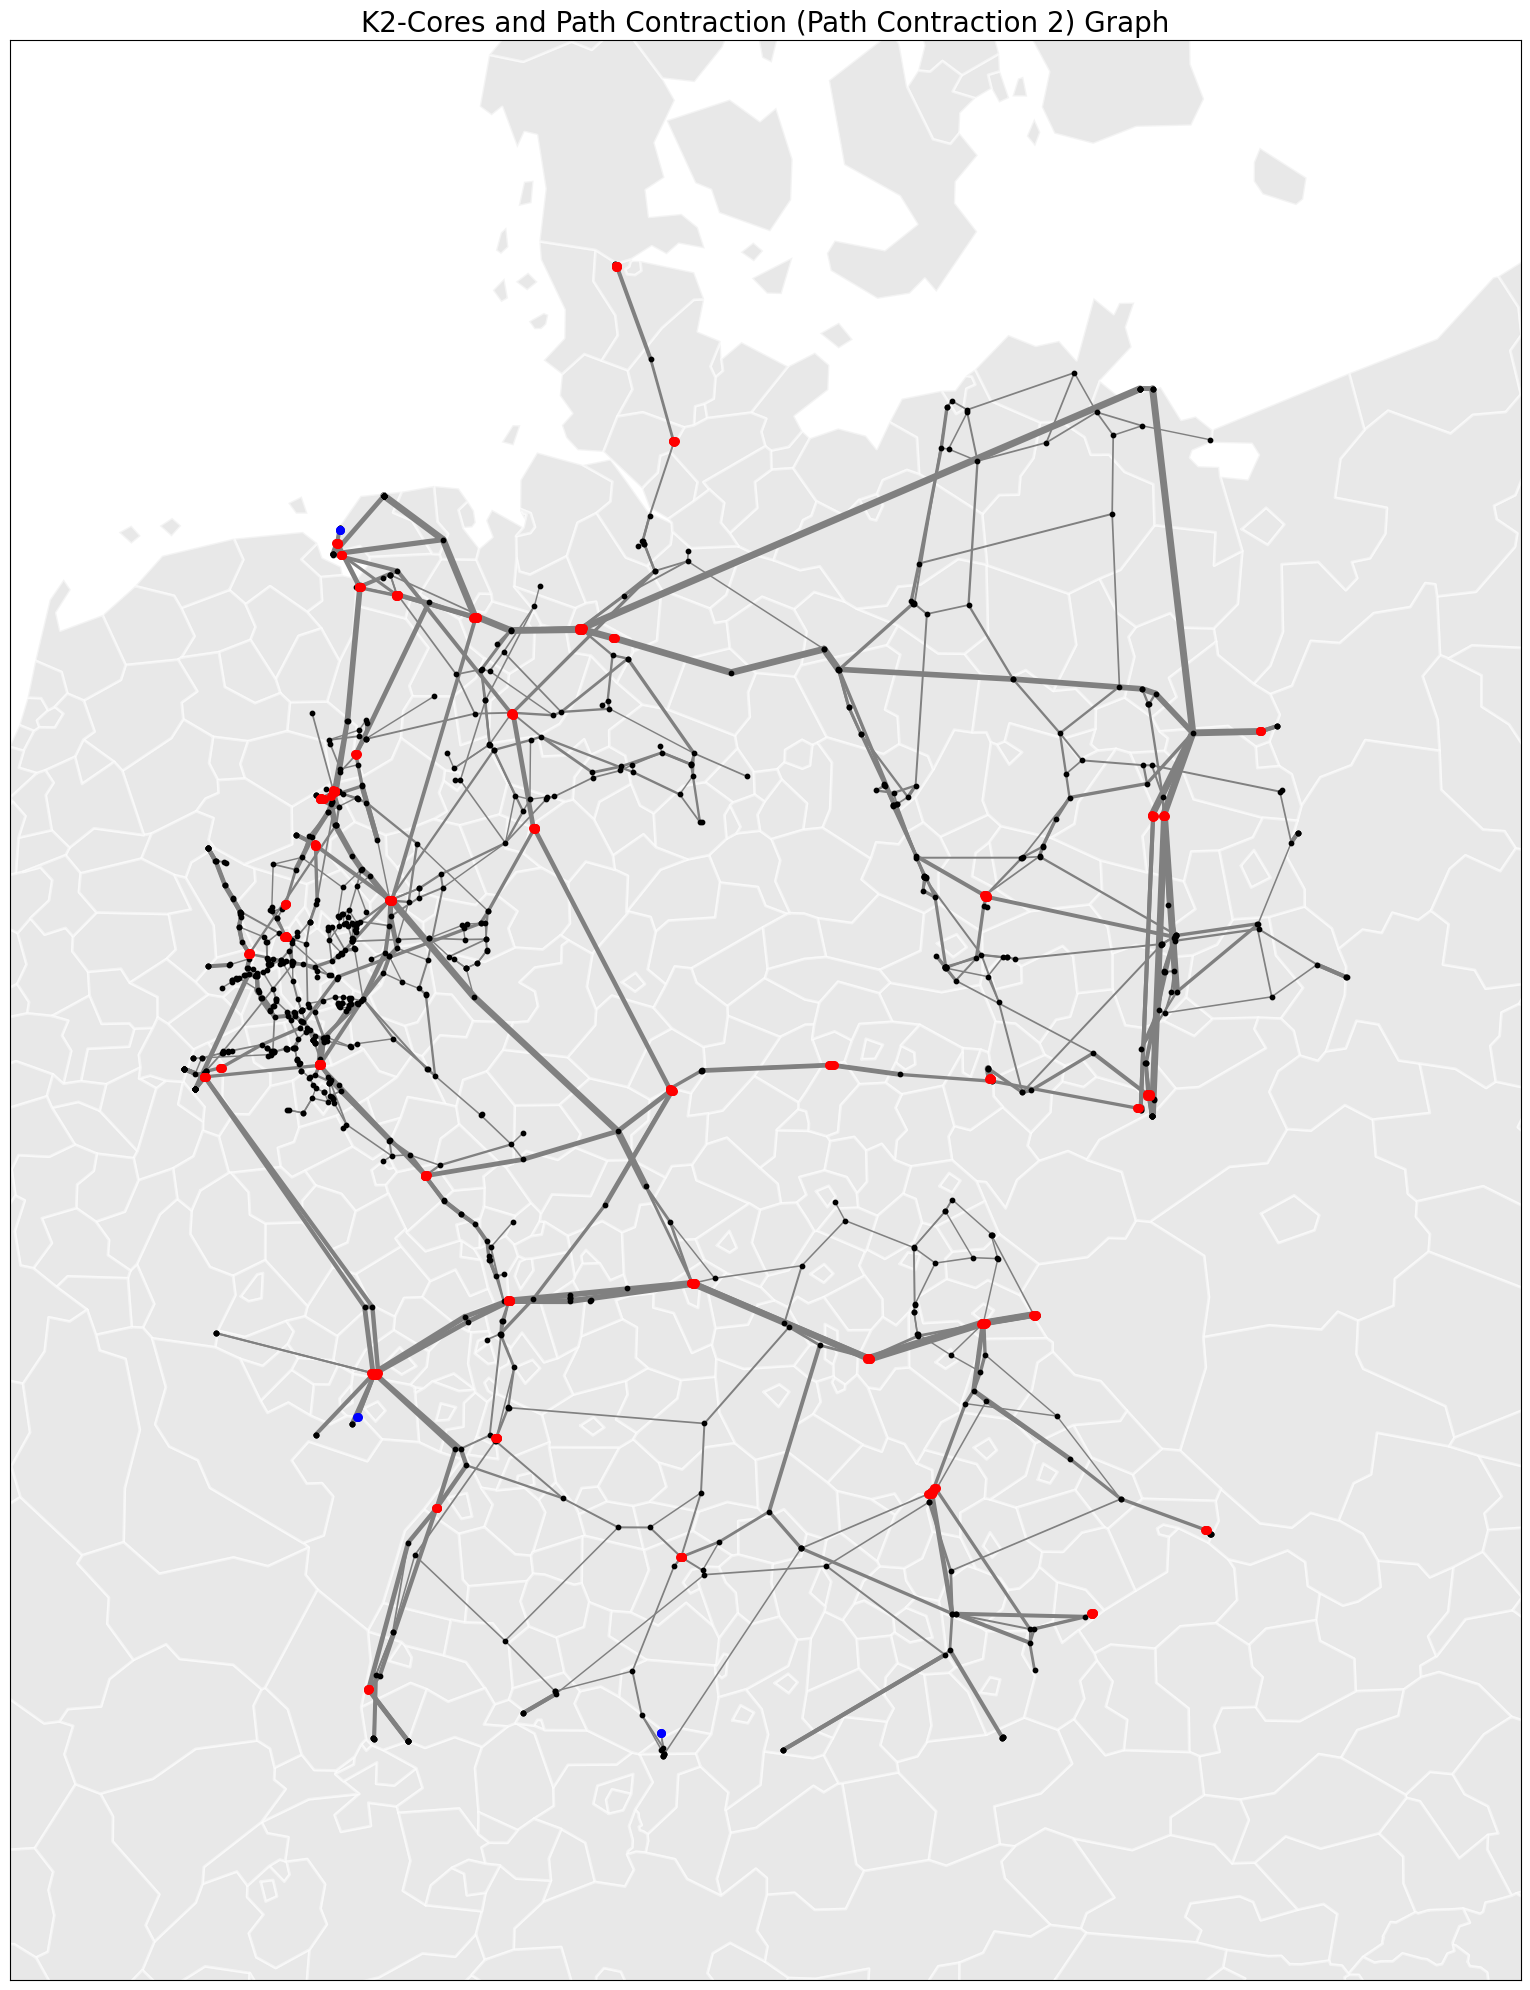

In [521]:
utils.plot_network(
	G=path_contraction_2,
	gdf=nuts3.to_crs("EPSG:3035"),
	title="K2-Cores and Path Contraction (Path Contraction 2) Graph"
	)

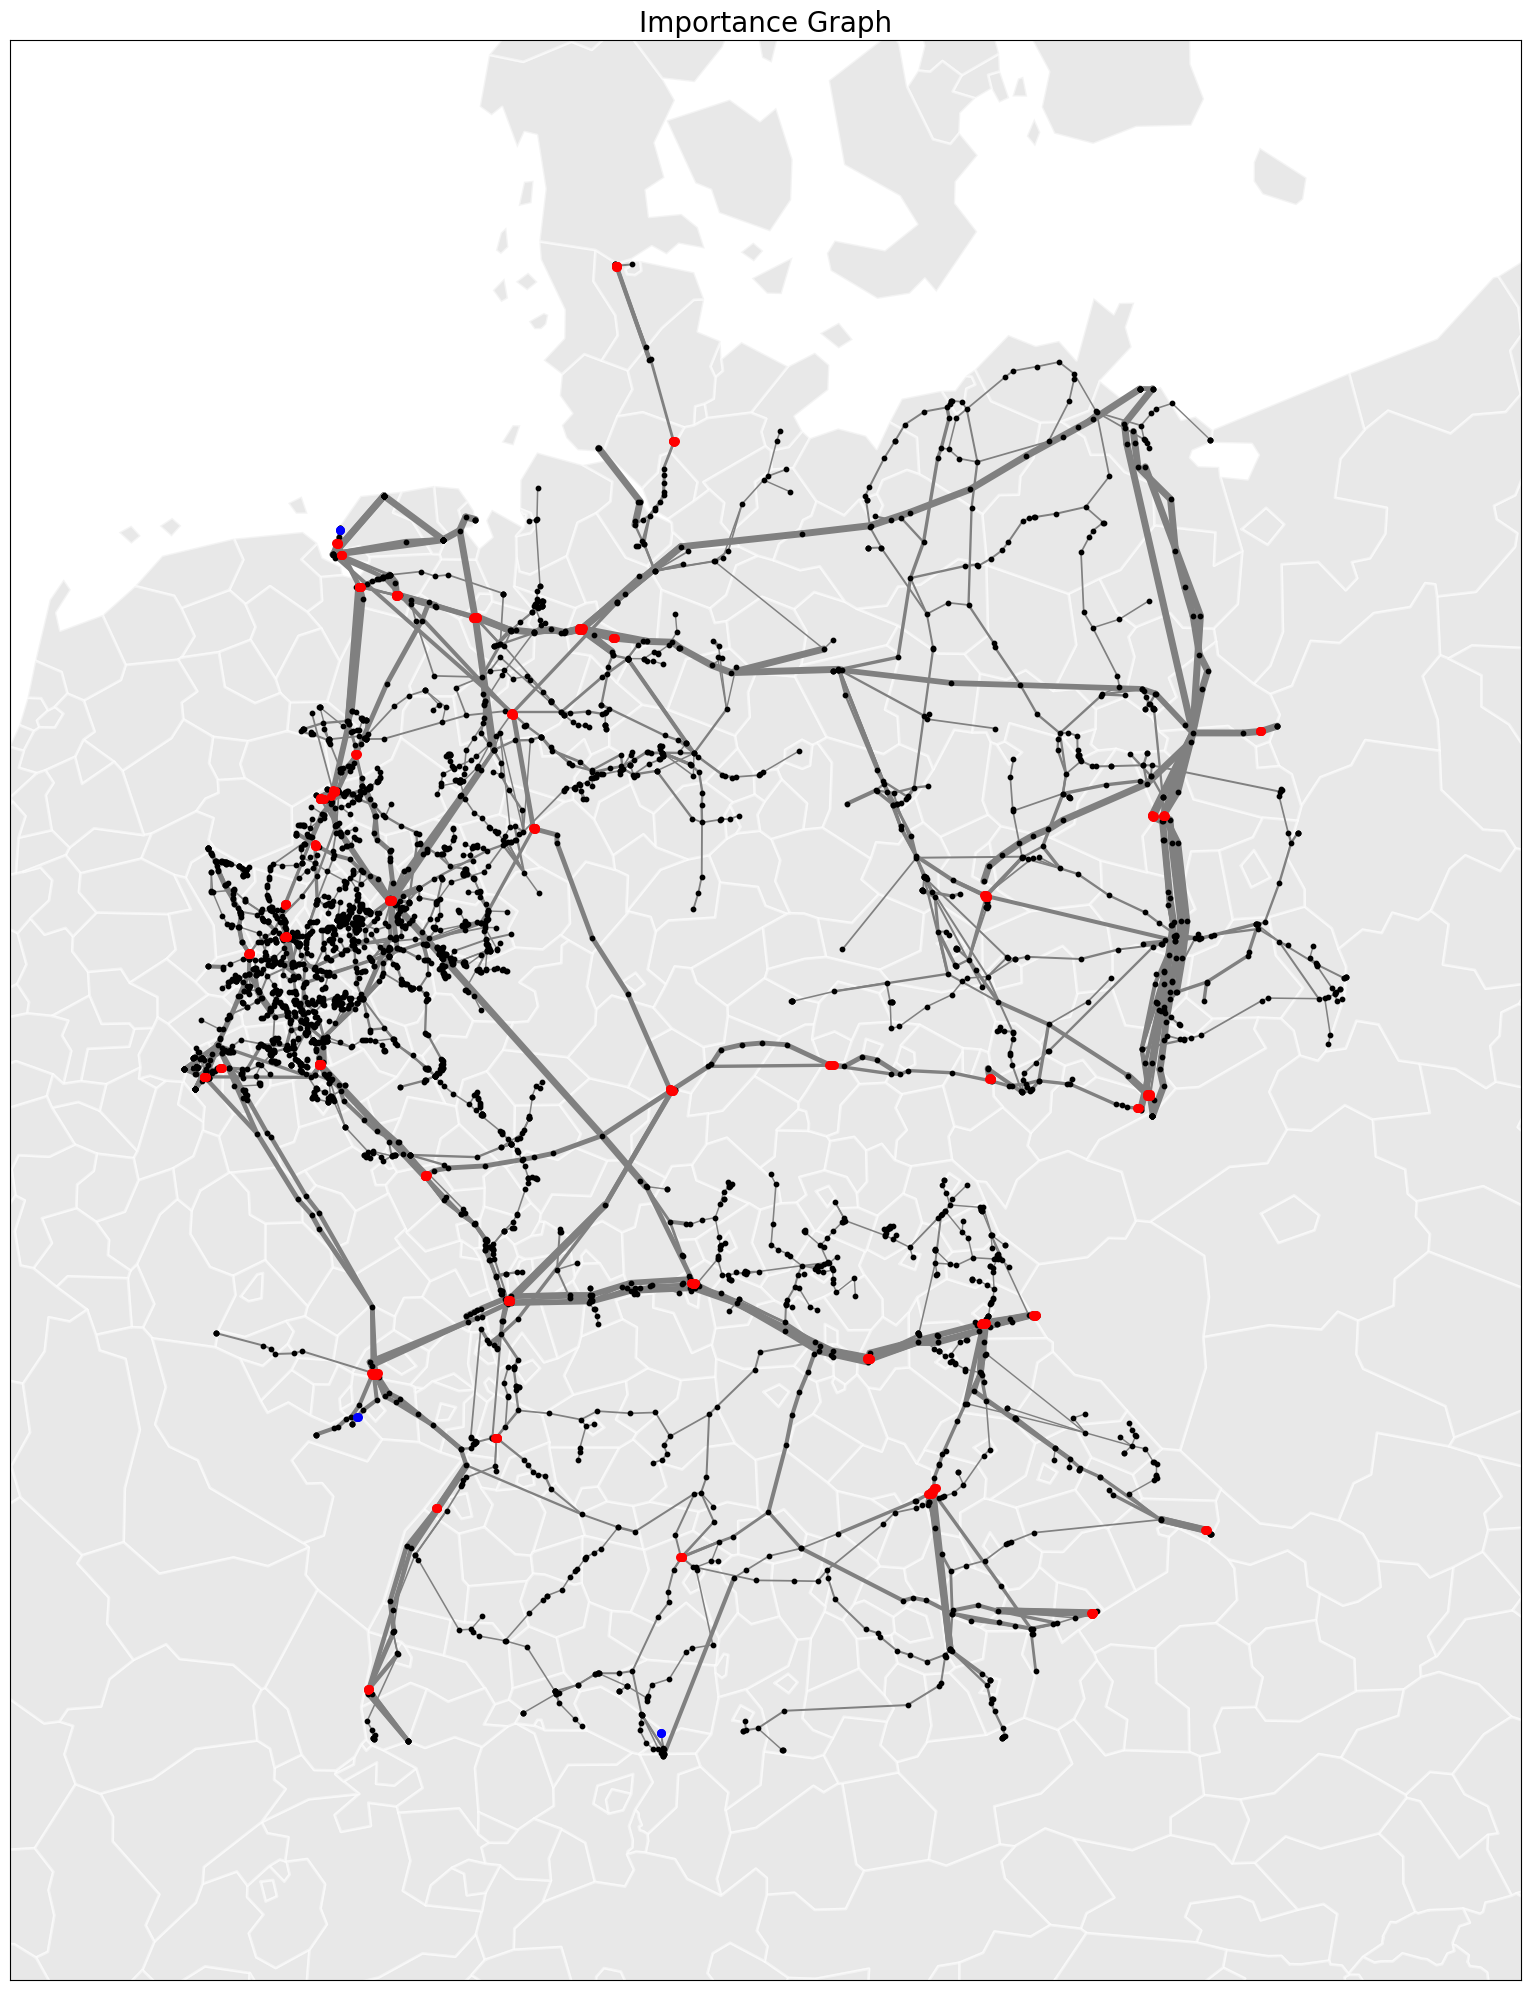

In [520]:
utils.plot_network(
	G=importance_graph,
	gdf=nuts3.to_crs("EPSG:3035"),
	title="Importance Graph"
	)

# Results

In [ ]:
res = results.scoring_results()